In [1]:
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

[INFO] torch/torchvision versions not as required, installing nightly versions.
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 97.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 90.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 97.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

torch version: 2.1.0+cu121
torchvision version: 0.16.0+cu121


In [2]:
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

[INFO] Couldn't find torchinfo... installing it.
[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 4036, done.
remote: Counting objects: 100% (1224/1224), done.
remote: Compressing objects: 100% (226/226), done.
remote: Total 4036 (delta 1067), reused 1080 (delta 995), pack-reused 2812
Receiving objects: 100% (4036/4036), 651.50 MiB | 23.34 MiB/s, done.
Resolving deltas: 100% (2360/2360), done.
Updating files: 100% (248/248), done.


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
!pip install typing-extensions==4.8.0

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.8.0 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 2.1.2 which is incompatible.
torchtext 0.16.0 requires torch==2.1.0, but you have torch 2.1.2 which is incompatible.


In [5]:
!curl "https://download.pytorch.org/models/efficientnet_b2_rwightman-bcdf34b7.pth" -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 35.1M  100 35.1M    0     0  48.0M      0 --:--:-- --:--:-- --:--:-- 47.9M


In [6]:
def create_effnetb2_model(num_classes: int = 101):
  weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
  transforms = weights.transforms()
  model = torchvision.models.efficientnet_b2(pretrained=False)

  for param in model.parameters():
    param.requires_grad = False

  model.load_state_dict(torch.load('efficientnet_b2_rwightman-bcdf34b7.pth'))

  model.classifier = nn.Sequential(
      nn.Dropout(p=0.3, inplace=True),
      nn.Linear(in_features=1408, out_features=num_classes)
  )

  return model, transforms

In [7]:
def create_vit_model(num_classes: int = 101):
  weights = torchvision.models.ViT_B_16_Weights.DEFAULT
  transforms = weights.transforms()
  model = torchvision.models.vit_b_16(weights=weights)

  for params in model.parameters():
    params.requires_grad = False

  model.heads = nn.Sequential(
      nn.Sequential(
          nn.Linear(in_features=768,
                    out_features=num_classes)
      )
  )

  return model, transforms

In [8]:
vit, vit_transforms = create_vit_model(3)
effnetb2, effnetb2_transforms = create_effnetb2_model(3)

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:04<00:00, 86.3MB/s]
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [9]:
data_20_percent_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip",
                                     destination="pizza_steak_sushi_20_percent")


[INFO] Did not find data/pizza_steak_sushi_20_percent directory, creating one...
[INFO] Downloading pizza_steak_sushi_20_percent.zip from https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip...
[INFO] Unzipping pizza_steak_sushi_20_percent.zip data...


In [10]:
train_dir = data_20_percent_path / "train"
test_dir = data_20_percent_path / "test"

In [11]:
!ls

data					going_modular	     __pycache__
efficientnet_b2_rwightman-bcdf34b7.pth	helper_functions.py  sample_data


In [12]:
from going_modular.going_modular import data_setup
train_dataloader_effnetb2, test_dataloader_effnetb2, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                                 test_dir=test_dir,
                                                                                                 transform=effnetb2_transforms,
                                                                                                 batch_size=32)


In [13]:
!ls -l

total 36048
drwxr-xr-x 3 root root     4096 Jan  7 17:00 data
-rw-r--r-- 1 root root 36882185 Jan  7 17:00 efficientnet_b2_rwightman-bcdf34b7.pth
drwxr-xr-x 4 root root     4096 Jan  7 16:59 going_modular
-rw-r--r-- 1 root root    10160 Jan  7 16:59 helper_functions.py
drwxr-xr-x 2 root root     4096 Jan  7 16:59 __pycache__
drwxr-xr-x 1 root root     4096 Jan  4 14:21 sample_data


In [14]:
from going_modular.going_modular import data_setup
train_dataloader_vit, test_dataloader_vit, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                       test_dir=test_dir,
                                                                                       transform=vit_transforms,
                                                                                       batch_size=32)


In [15]:
!ls -l

total 36048
drwxr-xr-x 3 root root     4096 Jan  7 17:00 data
-rw-r--r-- 1 root root 36882185 Jan  7 17:00 efficientnet_b2_rwightman-bcdf34b7.pth
drwxr-xr-x 4 root root     4096 Jan  7 16:59 going_modular
-rw-r--r-- 1 root root    10160 Jan  7 16:59 helper_functions.py
drwxr-xr-x 2 root root     4096 Jan  7 16:59 __pycache__
drwxr-xr-x 1 root root     4096 Jan  4 14:21 sample_data


In [16]:
optimizer_fb2 = torch.optim.Adam(params=effnetb2.parameters(),
                             lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

effnetb2_results = engine.train(model=effnetb2,
                                train_dataloader=train_dataloader_effnetb2,
                                test_dataloader=test_dataloader_effnetb2,
                                epochs=10,
                                optimizer=optimizer_fb2,
                                loss_fn=loss_fn,
                                device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0123 | train_acc: 0.5396 | test_loss: 0.7469 | test_acc: 0.9011
Epoch: 2 | train_loss: 0.7305 | train_acc: 0.8438 | test_loss: 0.6094 | test_acc: 0.9227
Epoch: 3 | train_loss: 0.5885 | train_acc: 0.8979 | test_loss: 0.4962 | test_acc: 0.9256
Epoch: 4 | train_loss: 0.5079 | train_acc: 0.8646 | test_loss: 0.4354 | test_acc: 0.9597
Epoch: 5 | train_loss: 0.3945 | train_acc: 0.9271 | test_loss: 0.3764 | test_acc: 0.9318
Epoch: 6 | train_loss: 0.4346 | train_acc: 0.8396 | test_loss: 0.3549 | test_acc: 0.9443
Epoch: 7 | train_loss: 0.3847 | train_acc: 0.9125 | test_loss: 0.3248 | test_acc: 0.9443
Epoch: 8 | train_loss: 0.3472 | train_acc: 0.8917 | test_loss: 0.3128 | test_acc: 0.9506
Epoch: 9 | train_loss: 0.3990 | train_acc: 0.9021 | test_loss: 0.2975 | test_acc: 0.9193
Epoch: 10 | train_loss: 0.3652 | train_acc: 0.9021 | test_loss: 0.3050 | test_acc: 0.9443


In [17]:
optimizer_vit = torch.optim.Adam(params=vit.parameters(),
                             lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

vit_results = engine.train(model=vit,
                           train_dataloader=train_dataloader_vit,
                           test_dataloader=test_dataloader_vit,
                           epochs=10,
                           optimizer=optimizer_vit,
                           loss_fn=loss_fn,
                           device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6527 | train_acc: 0.7688 | test_loss: 0.2524 | test_acc: 0.9659
Epoch: 2 | train_loss: 0.2248 | train_acc: 0.9458 | test_loss: 0.1254 | test_acc: 0.9812
Epoch: 3 | train_loss: 0.1510 | train_acc: 0.9583 | test_loss: 0.0929 | test_acc: 0.9812
Epoch: 4 | train_loss: 0.1324 | train_acc: 0.9646 | test_loss: 0.0830 | test_acc: 0.9812
Epoch: 5 | train_loss: 0.1300 | train_acc: 0.9354 | test_loss: 0.0809 | test_acc: 0.9812
Epoch: 6 | train_loss: 0.1194 | train_acc: 0.9437 | test_loss: 0.0754 | test_acc: 0.9812
Epoch: 7 | train_loss: 0.0802 | train_acc: 0.9792 | test_loss: 0.0723 | test_acc: 0.9812
Epoch: 8 | train_loss: 0.0671 | train_acc: 0.9875 | test_loss: 0.0677 | test_acc: 0.9812
Epoch: 9 | train_loss: 0.0825 | train_acc: 0.9938 | test_loss: 0.0627 | test_acc: 0.9812
Epoch: 10 | train_loss: 0.0525 | train_acc: 0.9958 | test_loss: 0.0600 | test_acc: 0.9812


In [18]:
from pathlib import Path

test_data_paths = list(Path(test_dir).glob("*/*.jpg"))

In [19]:
import pathlib
import torch

from PIL import Image
from timeit import default_timer as timer
from tqdm.auto import tqdm
from typing import List, Dict

# 1. Create a function to return a list of dictionaries with sample, truth label, prediction, prediction probability and prediction time
def pred_and_store(paths: List[pathlib.Path],
                   model: torch.nn.Module,
                   transform: torchvision.transforms,
                   class_names: List[str],
                   device: str = "cuda" if torch.cuda.is_available() else "cpu") -> List[Dict]:

    # 2. Create an empty list to store prediction dictionaires
    pred_list = []

    # 3. Loop through target paths
    for path in tqdm(paths):

        # 4. Create empty dictionary to store prediction information for each sample
        pred_dict = {}

        # 5. Get the sample path and ground truth class name
        pred_dict["image_path"] = path
        class_name = path.parent.stem
        pred_dict["class_name"] = class_name

        # 6. Start the prediction timer
        start_time = timer()

        # 7. Open image path
        img = Image.open(path)

        # 8. Transform the image, add batch dimension and put image on target device
        transformed_image = transform(img).unsqueeze(0).to(device)

        # 9. Prepare model for inference by sending it to target device and turning on eval() mode
        model.to(device)
        model.eval()

        # 10. Get prediction probability, predicition label and prediction class
        with torch.inference_mode():
            pred_logit = model(transformed_image) # perform inference on target sample
            pred_prob = torch.softmax(pred_logit, dim=1) # turn logits into prediction probabilities
            pred_label = torch.argmax(pred_prob, dim=1) # turn prediction probabilities into prediction label
            pred_class = class_names[pred_label.cpu()] # hardcode prediction class to be on CPU

            # 11. Make sure things in the dictionary are on CPU (required for inspecting predictions later on)
            pred_dict["pred_prob"] = round(pred_prob.unsqueeze(0).max().cpu().item(), 4)
            pred_dict["pred_class"] = pred_class

            # 12. End the timer and calculate time per pred
            end_time = timer()
            pred_dict["time_for_pred"] = round(end_time-start_time, 4)

        # 13. Does the pred match the true label?
        pred_dict["correct"] = class_name == pred_class

        # 14. Add the dictionary to the list of preds
        pred_list.append(pred_dict)

    # 15. Return list of prediction dictionaries
    return pred_list

In [20]:
effnetb2_test_pred_dicts = pred_and_store(paths=test_data_paths,
                                          model=effnetb2,
                                          transform=effnetb2_transforms,
                                          class_names=class_names,
                                          device=device)

  0%|          | 0/150 [00:00<?, ?it/s]

In [21]:
import pandas as pd
effnetb2_test_pred_df = pd.DataFrame(effnetb2_test_pred_dicts)
effnetb2_test_pred_df.head()

,image_path,class_name,pred_prob,pred_class,time_for_pred,correct
0,data/pizza_steak_sushi_20_percent/test/steak/4...,steak,0.8883,steak,0.1645,True
1,data/pizza_steak_sushi_20_percent/test/steak/2...,steak,0.7255,steak,0.0306,True
2,data/pizza_steak_sushi_20_percent/test/steak/3...,steak,0.9588,steak,0.0262,True
3,data/pizza_steak_sushi_20_percent/test/steak/2...,steak,0.5143,steak,0.0239,True
4,data/pizza_steak_sushi_20_percent/test/steak/3...,steak,0.5438,sushi,0.0231,False


In [22]:
effnetb2_test_pred_df.correct.value_counts()

True     142
False      8
Name: correct, dtype: int64

In [23]:
effnetb2_average_time_per_pred = round(effnetb2_test_pred_df.time_for_pred.mean(), 4)
print(f"EffNetB2 average time per prediction: {effnetb2_average_time_per_pred} seconds")

EffNetB2 average time per prediction: 0.0265 seconds


In [24]:
vit_test_pred_dicts = pred_and_store(paths=test_data_paths,
                                     model=vit,
                                     transform=vit_transforms,
                                     class_names=class_names,
                                     device=device)

  0%|          | 0/150 [00:00<?, ?it/s]

In [25]:
vit_test_pred_df = pd.DataFrame(vit_test_pred_dicts)
vit_test_pred_df.head()

,image_path,class_name,pred_prob,pred_class,time_for_pred,correct
0,data/pizza_steak_sushi_20_percent/test/steak/4...,steak,0.9938,steak,0.0411,True
1,data/pizza_steak_sushi_20_percent/test/steak/2...,steak,0.9830,steak,0.0387,True
2,data/pizza_steak_sushi_20_percent/test/steak/3...,steak,0.9172,steak,0.0285,True
3,data/pizza_steak_sushi_20_percent/test/steak/2...,steak,0.9476,steak,0.0334,True
4,data/pizza_steak_sushi_20_percent/test/steak/3...,steak,0.4756,steak,0.0288,True


In [26]:
vit_average_time_per_pred = round(vit_test_pred_df.time_for_pred.mean(), 4)
print(f"ViT average time per prediction: {vit_average_time_per_pred} seconds")

ViT average time per prediction: 0.0197 seconds


In [27]:
vit_food101, vit_transforms = create_vit_model(num_classes=101)

In [28]:
from torchvision import datasets

# Setup data directory
from pathlib import Path
data_dir = Path("data")

# Get training data (~750 images x 101 food classes)
train_data = datasets.Food101(root=data_dir, # path to download data to
                              split="train", # dataset split to get
                              transform=vit_transforms, # perform data augmentation on training data
                              download=True) # want to download?

# Get testing data (~250 images x 101 food classes)
test_data = datasets.Food101(root=data_dir,
                             split="test",
                             transform=vit_transforms, # perform normal EffNetB2 transforms on test data
                             download=True)

100%|██████████| 4996278331/4996278331 [04:18<00:00, 19332152.96it/s]


Extracting data/food-101.tar.gz to data


In [29]:
food101_class_names = train_data.classes

In [30]:
def split_dataset(dataset:torchvision.datasets, split_size:float=0.2, seed:int=42):
    """Randomly splits a given dataset into two proportions based on split_size and seed.

    Args:
        dataset (torchvision.datasets): A PyTorch Dataset, typically one from torchvision.datasets.
        split_size (float, optional): How much of the dataset should be split?
            E.g. split_size=0.2 means there will be a 20% split and an 80% split. Defaults to 0.2.
        seed (int, optional): Seed for random generator. Defaults to 42.

    Returns:
        tuple: (random_split_1, random_split_2) where random_split_1 is of size split_size*len(dataset) and
            random_split_2 is of size (1-split_size)*len(dataset).
    """
    # Create split lengths based on original dataset length
    length_1 = int(len(dataset) * split_size) # desired length
    length_2 = len(dataset) - length_1 # remaining length

    # Print out info
    print(f"[INFO] Splitting dataset of length {len(dataset)} into splits of size: {length_1} ({int(split_size*100)}%), {length_2} ({int((1-split_size)*100)}%)")

    # Create splits with given random seed
    random_split_1, random_split_2 = torch.utils.data.random_split(dataset,
                                                                   lengths=[length_1, length_2],
                                                                   generator=torch.manual_seed(seed)) # set the random seed for reproducible splits
    return random_split_1, random_split_2

In [31]:
train_data_food101_20_percent, _ = split_dataset(dataset=train_data,
                                                 split_size=0.2)

# Create testing 20% split of Food101
test_data_food101_20_percent, _ = split_dataset(dataset=test_data,
                                                split_size=0.2)

len(train_data_food101_20_percent), len(test_data_food101_20_percent)

[INFO] Splitting dataset of length 75750 into splits of size: 15150 (20%), 60600 (80%)
[INFO] Splitting dataset of length 25250 into splits of size: 5050 (20%), 20200 (80%)


(15150, 5050)

In [32]:
import os
import torch

BATCH_SIZE = 32
NUM_WORKERS = 2 if os.cpu_count() <= 4 else 4 # this value is very experimental and will depend on the hardware you have available, Google Colab generally provides 2x CPUs

# Create Food101 20 percent training DataLoader
train_dataloader_food101_20_percent = torch.utils.data.DataLoader(train_data_food101_20_percent,
                                                                  batch_size=BATCH_SIZE,
                                                                  shuffle=True,
                                                                  num_workers=NUM_WORKERS)
# Create Food101 20 percent testing DataLoader
test_dataloader_food101_20_percent = torch.utils.data.DataLoader(test_data_food101_20_percent,
                                                                 batch_size=BATCH_SIZE,
                                                                 shuffle=False,
                                                                 num_workers=NUM_WORKERS)

In [33]:
optimizer_vit = torch.optim.Adam(params=vit_food101.parameters(),
                             lr=1e-3)

# Setup loss function
loss_fn = torch.nn.CrossEntropyLoss(label_smoothing=0.1) # throw in a little label smoothing because so many classes

vit_food101_results = engine.train(model=vit_food101,
                                        train_dataloader=train_dataloader_food101_20_percent,
                                        test_dataloader=test_dataloader_food101_20_percent,
                                        optimizer=optimizer_vit,
                                        loss_fn=loss_fn,
                                        epochs=5,
                                        device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.6374 | train_acc: 0.4856 | test_loss: 2.0399 | test_acc: 0.6298
Epoch: 2 | train_loss: 1.9609 | train_acc: 0.6719 | test_loss: 1.9181 | test_acc: 0.6690
Epoch: 3 | train_loss: 1.7694 | train_acc: 0.7378 | test_loss: 1.8655 | test_acc: 0.6891
Epoch: 4 | train_loss: 1.6507 | train_acc: 0.7836 | test_loss: 1.8523 | test_acc: 0.6937
Epoch: 5 | train_loss: 1.5642 | train_acc: 0.8156 | test_loss: 1.8333 | test_acc: 0.6950


In [34]:
vit_food101_results

{'train_loss': [2.6373726506776447,
  1.960869712668632,
  1.7693843587541378,
  1.6506509795973572,
  1.5641759146114944],
 'train_acc': [0.4856370554550934,
  0.6718938366485835,
  0.7377655967450271,
  0.7836139993972273,
  0.8156268836648582],
 'test_loss': [2.0399280228192294,
  1.918127425863773,
  1.8655235820178744,
  1.8522941621044013,
  1.8333016935783097],
 'test_acc': [0.6298229065238559,
  0.6689995131450828,
  0.6890670642648491,
  0.6936617575462513,
  0.6950462512171373]}

In [35]:
from tqdm.auto import tqdm
from typing import Dict, List, Tuple

def wrongpreds(model: torch.nn.Module,
               test_dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               device: torch.device) -> Tuple[float, float]:
  wrong_preds = []

  model.eval()
  with torch.inference_mode():
      for X, y in test_dataloader:
          X, y = X.to(device), y.to(device)
          y_logit = model(X).squeeze()
          y_pred_probs = y_logit.softmax(dim=1)
          y_pred = y_logit.argmax(dim=1)

          wrong_indices = y_pred != y

          if wrong_indices.any():
              wrong_X = X[wrong_indices]
              wrong_y_pred_probs = y_pred_probs[wrong_indices]
              wrong_y = y[wrong_indices]
              wrong_y_pred = y_pred[wrong_indices]

              for i in range(wrong_X.shape[0]):
                  wrong_preds.append((wrong_X[i],
                                    wrong_y_pred_probs[i].max(),
                                    wrong_y[i],
                                    wrong_y_pred[i]))

  return wrong_preds

In [36]:
wrong_preds = wrongpreds(vit_food101, test_dataloader_food101_20_percent, loss_fn, device)

In [37]:
wrong_preds_sorted = sorted(wrong_preds, key=lambda x: x[1], reverse=True)

In [38]:
import matplotlib.pyplot as plt
import numpy as np

In [39]:
len(wrong_preds_sorted)

1540

96.93% dumplings gyoza
94.99% fried_rice paella
93.11% ice_cream frozen_yogurt
90.72% miso_soup creme_brulee
90.65% cannoli baby_back_ribs


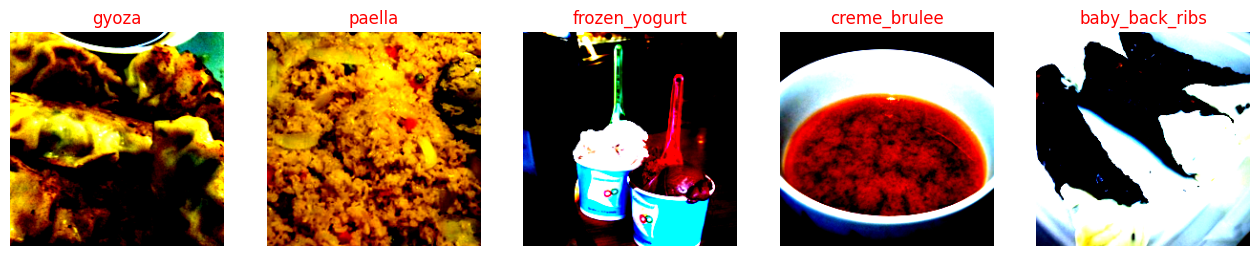

In [40]:
plt.figure(figsize=(16,8))

for i in range(5):
    print(f"{wrong_preds_sorted[i][1] * 100:.2f}% {food101_class_names[wrong_preds_sorted[i][2]]} {food101_class_names[wrong_preds_sorted[i][3]]}")

    targ_image = wrong_preds_sorted[i][0].permute(1, 2, 0) # H,W,C -> C,H,W
    img_as_array = np.asarray(targ_image.cpu())

    plt.subplot(1, 5, i+1)
    plt.imshow(img_as_array)
    plt.axis(False)

    title = f"{food101_class_names[wrong_preds_sorted[i][3]]}"
    plt.title(title, c="r")

In [41]:
import os
import torch

BATCH_SIZE = 32
NUM_WORKERS = 2 if os.cpu_count() <= 4 else 4 # this value is very experimental and will depend on the hardware you have available, Google Colab generally provides 2x CPUs

# Create Food101 20 percent training DataLoader
train_dataloader_food101 = torch.utils.data.DataLoader(train_data,
                                                       batch_size=BATCH_SIZE,
                                                       shuffle=True,
                                                       num_workers=NUM_WORKERS)
# Create Food101 20 percent testing DataLoader
test_dataloader_food101 = torch.utils.data.DataLoader(test_data,
                                                      batch_size=BATCH_SIZE,
                                                      shuffle=False,
                                                      num_workers=NUM_WORKERS)

In [42]:
vit_food101_results_new = engine.train(model=vit_food101,
                                       train_dataloader=train_dataloader_food101,
                                       test_dataloader=test_dataloader_food101,
                                       optimizer=optimizer_vit,
                                       loss_fn=loss_fn,
                                       epochs=5,
                                       device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.8536 | train_acc: 0.7046 | test_loss: 1.7015 | test_acc: 0.7430
Epoch: 2 | train_loss: 1.7324 | train_acc: 0.7430 | test_loss: 1.6803 | test_acc: 0.7523
Epoch: 3 | train_loss: 1.6811 | train_acc: 0.7610 | test_loss: 1.6734 | test_acc: 0.7590
Epoch: 4 | train_loss: 1.6488 | train_acc: 0.7713 | test_loss: 1.6751 | test_acc: 0.7575
Epoch: 5 | train_loss: 1.6271 | train_acc: 0.7804 | test_loss: 1.6922 | test_acc: 0.7530


In [43]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

data_dir = "./data/caltech101"

# Load the Caltech101 dataset
dataset = datasets.Caltech101(root=data_dir, download=True, transform=vit_transforms)

# Split the dataset into train and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoaders for training and testing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Now, train_loader and test_loader are ready to be used with your ViT model

131740031it [00:01, 107692649.62it/s]


Extracting ./data/caltech101/caltech101/101_ObjectCategories.tar.gz to ./data/caltech101/caltech101


14028800it [00:00, 110294780.13it/s]


Extracting ./data/caltech101/caltech101/Annotations.tar to ./data/caltech101/caltech101


In [44]:
optimizer_vit = torch.optim.Adam(params=vit_food101.parameters(),
                             lr=1e-3)

In [48]:
summary(vit_food101)

Layer (type:depth-idx)                                            Param #
VisionTransformer                                                 768
├─Conv2d: 1-1                                                     (590,592)
├─Encoder: 1-2                                                    151,296
│    └─Dropout: 2-1                                               --
│    └─Sequential: 2-2                                            --
│    │    └─EncoderBlock: 3-1                                     (7,087,872)
│    │    └─EncoderBlock: 3-2                                     (7,087,872)
│    │    └─EncoderBlock: 3-3                                     (7,087,872)
│    │    └─EncoderBlock: 3-4                                     (7,087,872)
│    │    └─EncoderBlock: 3-5                                     (7,087,872)
│    │    └─EncoderBlock: 3-6                                     (7,087,872)
│    │    └─EncoderBlock: 3-7                                     (7,087,872)
│    │    └─EncoderBlo

In [49]:
vit_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),  # Convert grayscale to RGB
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [50]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

data_dir = "./data/caltech101"

# Load the Caltech101 dataset
dataset = datasets.Caltech101(root=data_dir, download=True, transform=vit_transforms)

# Split the dataset into train and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoaders for training and testing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Now, train_loader and test_loader are ready to be used with your ViT model

Files already downloaded and verified


In [51]:
optimizer_vit = torch.optim.Adam(params=vit_food101.parameters(),
                             lr=1e-3)

In [52]:
vit_caltech101_results_new = engine.train(model=vit_food101,
                                       train_dataloader=train_loader,
                                       test_dataloader=test_loader,
                                       optimizer=optimizer_vit,
                                       loss_fn=loss_fn,
                                       epochs=5,
                                       device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.5394 | train_acc: 0.5937 | test_loss: 1.4075 | test_acc: 0.8443
Epoch: 2 | train_loss: 1.2239 | train_acc: 0.9070 | test_loss: 1.2675 | test_acc: 0.8943
Epoch: 3 | train_loss: 1.0804 | train_acc: 0.9604 | test_loss: 1.2167 | test_acc: 0.9080
Epoch: 4 | train_loss: 1.0086 | train_acc: 0.9827 | test_loss: 1.1900 | test_acc: 0.9136
Epoch: 5 | train_loss: 0.9673 | train_acc: 0.9916 | test_loss: 1.1789 | test_acc: 0.9153


In [81]:

!pip install typing-extensions==4.8.0

  Using cached typing_extensions-4.8.0-py3-none-any.whl (31 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.8.0 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 2.1.2 which is incompatible.
torchtext 0.16.0 requires torch==2.1.0, but you have torch 2.1.2 which is incompatible.


In [55]:
!pip install --upgrade pydantic

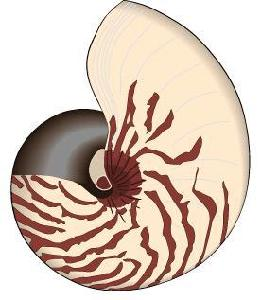

In [59]:
import random
from PIL import Image

# Get a list of all test image filepaths
test_data_paths = list(Path(data_dir).glob("*/*/*/*.jpg"))
random_image_path = random.sample(test_data_paths, k=1)[0]

# Open the target image
image = Image.open(random_image_path)
image

In [60]:
example_list = [[str(filepath)] for filepath in random.sample(test_data_paths, k=10)]

In [93]:
from typing import Tuple, Dict

caltech101_class_names = dataset.categories

def predict(img) -> Tuple[Dict, float]:
    """Transforms and performs a prediction on img and returns prediction and time taken.
    """
    # Start the timer
    start_time = timer()

    # Transform the target image and add a batch dimension
    img = vit_transforms(img).unsqueeze(0).to(device)

    # Put model into evaluation mode and turn on inference mode
    vit_food101.eval()
    with torch.inference_mode():
        # Pass the transformed image through the model and turn the prediction logits into prediction probabilities
        pred_probs = torch.softmax(vit_food101(img), dim=1)

    # Create a prediction label and prediction probability dictionary for each prediction class (this is the required format for Gradio's output parameter)
    pred_labels_and_probs = {caltech101_class_names[i]: float(pred_probs[0][i]) for i in range(len(caltech101_class_names))}

    # Calculate the prediction time
    pred_time = round(timer() - start_time, 5)

    # Return the prediction dictionary and prediction time
    return pred_labels_and_probs, pred_time

In [75]:
!pip uninstall gradio -y
!pip install -q gradio --use-deprecated=legacy-resolver

Found existing installation: gradio 3.45.0
Uninstalling gradio-3.45.0:
  Successfully uninstalled gradio-3.45.0


In [70]:

!pip install typing-extensions==4.8.0

  Using cached typing_extensions-4.8.0-py3-none-any.whl (31 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.8.0 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 2.1.2 which is incompatible.
torchtext 0.16.0 requires torch==2.1.0, but you have torch 2.1.2 which is incompatible.


In [79]:
!pip install -q gradio --use-deprecated=legacy-resolver


ERROR: pip's legacy dependency resolver does not consider dependency conflicts when selecting packages. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you'll have typing-extensions 4.9.0 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you'll have torch 2.1.2 which is incompatible.
torchtext 0.16.0 requires torch==2.1.0, but you'll have torch 2.1.2 which is incompatible.


In [85]:
!pip uninstall -y tensorflow-probability
!pip install fastapi==0.104.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: fastapi
    Found existing installation: fastapi 0.100.0
    Uninstalling fastapi-0.100.0:
      Successfully uninstalled fastapi-0.100.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.


In [89]:
!pip install -q gradio==3.48.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 30.5 MB/s eta 0:00:00


In [95]:
import gradio as gr

# Create title, description and article strings
title = "Caltech 101 image classification"
description = "An ViT feature extractor computer vision model to classify the Caltech-101 dataset."
article = "Created by lestetedelioncourt"

# Create the Gradio demo
demo = gr.Interface(fn=predict, # mapping function from input to output
                    inputs=gr.Image(type="pil"), # what are the inputs?
                    outputs=[gr.Label(num_top_classes=5, label="Predictions"), # what are the outputs?
                             gr.Number(label="Prediction time (s)")], # our fn has two outputs, therefore we have two outputs
                    examples=example_list,
                    title=title,
                    description=description,
                    article=article)

# Launch the demo!
demo.launch(debug=False, # print errors locally?
            share=True) # generate a publically shareable URL?

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://c2af9d3ab627d8b563.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [94]:
random_image_path = random.sample(test_data_paths, k=1)[0]

# Open the target image
image = Image.open(random_image_path)
print(f"[INFO] Predicting on image at path: {random_image_path}\n")

pred_dict, pred_time = predict(img=image)
print(f"Prediction label and probability dictionary: \n{pred_dict}")
print(f"Prediction time: {pred_time} seconds")

[INFO] Predicting on image at path: data/caltech101/caltech101/101_ObjectCategories/airplanes/image_0550.jpg

Prediction label and probability dictionary: 
{'Faces': 4.4318061554804444e-05, 'Faces_easy': 0.0012698705540969968, 'Leopards': 0.0005052692722529173, 'Motorbikes': 0.0018590554827824235, 'accordion': 0.000256598083069548, 'airplanes': 0.9543468952178955, 'anchor': 0.00047953648027032614, 'ant': 0.002126104664057493, 'barrel': 0.001021015108563006, 'bass': 0.0008871007594279945, 'beaver': 0.0005406278651207685, 'binocular': 4.404977153171785e-05, 'bonsai': 0.0002709724649321288, 'brain': 0.00045136481639929116, 'brontosaurus': 0.0002664947824086994, 'buddha': 0.00022953424195293337, 'butterfly': 6.034577017999254e-05, 'camera': 0.00037717027589678764, 'cannon': 6.47642882540822e-05, 'car_side': 9.062066965270787e-05, 'ceiling_fan': 0.00023586903989780694, 'cellphone': 0.0002987619081977755, 'chair': 0.0003094242711085826, 'chandelier': 0.00017548319010529667, 'cougar_body': 0.

In [96]:
from pathlib import Path

caltech101_demo_path = Path("demos/caltech101/")

caltech101_demo_path.mkdir(parents=True, exist_ok=True)
(caltech101_demo_path / "examples").mkdir(parents=True, exist_ok=True)

In [97]:
caltech101_class_names_path = caltech101_demo_path / "class_names.txt"

with open(caltech101_class_names_path, "w") as f:
  print(f"[INFO] Saving Food1101 class names to {caltech101_class_names_path}")
  f.write("\n".join(caltech101_class_names))

[INFO] Saving Food1101 class names to demos/caltech101/class_names.txt


In [98]:
%%writefile demos/caltech101/model.py

import torch
import torchvision
from torch import nn

def create_vit_model(num_classes: int = 101):
  weights = torchvision.models.ViT_B_16_Weights.DEFAULT
  transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),  # Convert grayscale to RGB
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])
  model = torchvision.models.vit_b_16(weights=weights)

  for params in model.parameters():
    params.requires_grad = False

  model.heads = nn.Sequential(
      nn.Sequential(
          nn.Linear(in_features=768,
                    out_features=num_classes)
      )
  )

  return model, transforms

Writing demos/caltech101/model.py


In [99]:
torch.save(vit_food101.state_dict(), 'vit_caltech101.pth')

In [101]:
!cp vit_caltech101.pth demos/caltech101/

In [103]:
%%writefile demos/caltech101/app.py

import gradio as gr
import os
import torch

from model import create_vit_model
from timeit import default_timer as timer
from typing import Tuple, Dict

with open("class_names.txt", "r") as f:
  class_names = [class_name.strip() for class_name in f.readlines()]

vit, vit_transforms = create_vit_model(num_classes=101)

vit.load_state_dict(
    torch.load(
        f="vit_caltech101.pth",
        map_location=torch.device("cpu")
    )
)

def predict(img) -> Tuple[Dict, float]:
    """Transforms and performs a prediction on img and returns prediction and time taken.
    """
    # Start the timer
    start_time = timer()

    # Transform the target image and add a batch dimension
    img = vit_transforms(img).unsqueeze(0)

    # Put model into evaluation mode and turn on inference mode
    vit.eval()
    with torch.inference_mode():
        # Pass the transformed image through the model and turn the prediction logits into prediction probabilities
        pred_probs = torch.softmax(vit(img), dim=1)

    # Create a prediction label and prediction probability dictionary for each prediction class (this is the required format for Gradio's output parameter)
    pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}

    # Calculate the prediction time
    pred_time = round(timer() - start_time, 5)

    # Return the prediction dictionary and prediction time
    return pred_labels_and_probs, pred_time

def predict(img) -> Tuple[Dict, float]:
    """Transforms and performs a prediction on img and returns prediction and time taken.
    """
    # Start the timer
    start_time = timer()

    # Transform the target image and add a batch dimension
    img = vit_transforms(img).unsqueeze(0)

    # Put model into evaluation mode and turn on inference mode
    vit.eval()
    with torch.inference_mode():
        # Pass the transformed image through the model and turn the prediction logits into prediction probabilities
        pred_probs = torch.softmax(vit(img), dim=1)

    # Create a prediction label and prediction probability dictionary for each prediction class (this is the required format for Gradio's output parameter)
    pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}

    # Calculate the prediction time
    pred_time = round(timer() - start_time, 5)

    # Return the prediction dictionary and prediction time
    return pred_labels_and_probs, pred_time

example_list = [["examples/" + example] for example in os.listdir("examples")]

# Create title, description and article strings
title = "Caltech 101 image classification"
description = "An ViT feature extractor computer vision model to classify the Caltech-101 dataset."
article = "Created by lestetedelioncourt"

# Create the Gradio demo
demo = gr.Interface(fn=predict, # mapping function from input to output
                    inputs=gr.Image(type="pil"), # what are the inputs?
                    outputs=[gr.Label(num_top_classes=5, label="Predictions"), # what are the outputs?
                             gr.Number(label="Prediction time (s)")], # our fn has two outputs, therefore we have two outputs
                    examples=example_list,
                    title=title,
                    description=description,
                    article=article)

# Launch the demo!
demo.launch(debug=False, # print errors locally?
            share=True) # generate a publically shareable URL?

Writing demos/caltech101/app.py


In [104]:
!cp /content/data/caltech101/caltech101/101_ObjectCategories/Faces/image_0002.jpg demos/caltech101/examples/

In [105]:
%%writefile demos/caltech101/requirements.txt

torch==2.1.0
torchvision==0.16.0
gradio==4.8.0

Writing demos/caltech101/requirements.txt


In [107]:
!cd demos/caltech101/ && zip -r ../caltech101.zip * -x "*.pyc" "*.ipynb" "*__pycache__*" "*ipynb_checkpoints*"

  adding: app.py (deflated 69%)
  adding: class_names.txt (deflated 44%)
  adding: examples/ (stored 0%)
  adding: examples/image_0002.jpg (deflated 0%)
  adding: model.py (deflated 48%)
  adding: requirements.txt (deflated 8%)
  adding: vit_caltech101.pth (deflated 7%)


In [108]:
!ls -lh demos/caltech101

total 328M
-rw-r--r-- 1 root root 3.4K Jan  7 22:33 app.py
-rw-r--r-- 1 root root  887 Jan  7 21:50 class_names.txt
drwxr-xr-x 2 root root 4.0K Jan  7 22:34 examples
-rw-r--r-- 1 root root  719 Jan  7 21:54 model.py
-rw-r--r-- 1 root root   48 Jan  7 22:35 requirements.txt
-rw-r--r-- 1 root root 328M Jan  7 22:11 vit_caltech101.pth


In [109]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [112]:
import shutil

# Path to your file in Colab
source_path = 'demos/caltech101.zip'

# Path where you want to move the file in Google Drive
destination_path = '/content/drive/My Drive/caltech101.zip'

# Move the file
shutil.copy(destination_path, source_path)

'demos/caltech101.zip'